# Packages

Packages are pre-built python 'pieces' that we can install and import into our workspace for making our life easier. There's a vast variety of packages in the world. Here we'll be using few of the most common ones when it comes to data analysis and visualization.

- **pandas:** A very popular tabular data manipulation library. It will allow us to format and work our your data with table-like objects named data frames.
- **numpy:** Numerical analysis library with a wide range of mathematical libraries and matrix operations. If you have used Matlab before this one will look familiar.
- **scipy:** Another important package composed of numerical libraries, part of the same ecosystem that compiles pandas and numpy. We'll be using the stats functions here. 
- **widgets:** It will enable interactive controls in order to tweak the plots.
- **matplotlib:** The classic plotting library.
- **seaborn:** Built on top of matplotlib, tailored for easy descriptive statistical plots on your data.

In [63]:
from scipy.stats import *
import numpy
import statsmodels
import pandas

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed
%matplotlib inline

### Discrete population

In [54]:
pop = [1]*75 + [2]*30 + [3]*80 + [4]*95

In [55]:
len(pop)

280

In [56]:
[numpy.mean(pop),
numpy.median(pop)]

[2.6964285714285716, 3.0]

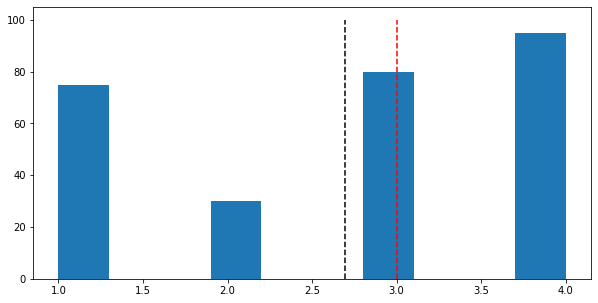

In [57]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.hist(pop)
ax.plot([numpy.mean(pop)] * 2, [0, 100], 'k--')
ax.plot([numpy.median(pop)] * 2, [0, 100], 'r--');

### Continuous population 

Assumed a normal PDF, where 'assumed' is a big word carrying a lot of assumptions and even phylosofical issues such as,

- X samples are i.i.d
- etc.

Explain Gaussian PDF and quantile function to bound the range

$$\epsilon = {1 \over 10 ^ {a}}$$

In [70]:
@interact(a = (1.0, 16.0, 1.0), n = fixed(1000))
def plot_population_distribution(n, a = 1.0):
#     n = 1000
    epsilon = 1.0 / (10.0 ** a)
    x = numpy.linspace(norm.ppf(epsilon), norm.ppf(1 - epsilon), n)   
    plt.figure(figsize=(12, 5))
    plt.plot(x, norm.pdf(x));
    plt.text(norm.ppf(epsilon)*0.8, norm.pdf(x).max(), r'$\epsilon = {}$'.format(epsilon), 
             ha="center", 
             va="center", 
             size=12)

interactive(children=(FloatSlider(value=1.0, description='a', max=16.0, min=1.0, step=1.0), Output()), _dom_cl…

### Samples

#### Scaling and sizing the standard normal N(0,1)

In [60]:
n = 10000
epsilon = 1e-3
max_pop_mean = 3
max_pop_std = 5
x_range = [norm.ppf(epsilon, loc = -max_pop_mean, scale = max_pop_std), 
           norm.ppf(1 - epsilon, loc = max_pop_mean, scale = max_pop_std)]

@interact(n = (2, n, 200), std = (1, max_pop_std, 1), mean = (-max_pop_mean, max_pop_mean, 1))
def plot_sample_histogram(n = 1000, std = 1, mean = 0):
    X = norm.rvs(loc = mean, scale = std, size = n)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey = True, gridspec_kw = {'width_ratios': [1, 3]})
    axs[0].set_ylim(x_range)
    counts, bins, bars = axs[0].hist(X, bins = 'auto', orientation = 'horizontal')
    axs[1].plot(X)
    axs[1].plot([0, n], [mean] * 2, 'k--');
    axs[0].plot([0, counts.max() * (1 + .12)], [mean] * 2,'k--');

interactive(children=(IntSlider(value=1000, description='n', max=10000, min=2, step=200), IntSlider(value=1, d…

__TODO__: Add fixed line at 0, change color and join both plots in subplots

### Pareto distribution

In [65]:
df_bookings = pandas.read_csv(r'./data/bookings_sample_1_suppliers.csv')

In [71]:
y = df_bookings.hotel.value_counts().to_list()
x = list(range(1, len(y) + 1))

@interact(axis_cut = (1, len(y), 100))
def plot_sample_histogram(axis_cut = 1000):
    fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 5))
    ax[1].set_yscale('log', basey=10)
    ax[1].set_xscale('log')
    ax[1].get_xaxis().get_major_formatter().labelOnlyBase = False
    ax[1].get_yaxis().get_major_formatter().labelOnlyBase = False
    ax[0].plot(x[0:axis_cut], y[0:axis_cut], 'o-', color = 'orange', alpha=0.6)
    ax[1].plot(x[0:axis_cut], y[0:axis_cut]);

interactive(children=(IntSlider(value=1000, description='axis_cut', max=66736, min=1, step=100), Output()), _d…

MLE with scipy

__TODO__: fit, etc.

QQ plot

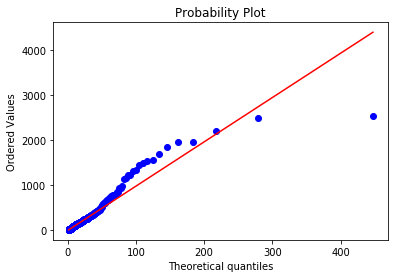

In [152]:
probplot(y, dist='pareto', sparams = 1.88, plot=plt);